In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 데이터 생성
- 남자와 여자의 키와 몸무게를 군집화


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [3]:
random.randint(40,95) # 40 부터 95까지의 정수중 하나를 무작위 선택 후 반환

44

In [7]:
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
data

[[40, 148],
 [46, 144],
 [61, 150],
 [53, 169],
 [68, 158],
 [42, 158],
 [40, 154],
 [60, 144],
 [42, 167],
 [65, 165],
 [70, 149],
 [59, 161],
 [51, 157],
 [70, 159],
 [65, 152],
 [65, 169],
 [68, 147],
 [45, 147],
 [57, 164],
 [60, 157],
 [46, 142],
 [46, 145],
 [46, 147],
 [57, 166],
 [47, 159],
 [55, 165],
 [64, 148],
 [63, 156],
 [44, 147],
 [49, 155],
 [68, 144],
 [48, 144],
 [50, 170],
 [45, 150],
 [65, 165],
 [56, 167],
 [57, 149],
 [46, 151],
 [57, 161],
 [46, 154],
 [52, 142],
 [41, 146],
 [56, 143],
 [58, 161],
 [70, 164],
 [51, 168],
 [62, 140],
 [65, 164],
 [64, 151],
 [45, 146]]

In [8]:
data.append([random.randint(60,95), random.randint(160,195)])
data

[[40, 148],
 [46, 144],
 [61, 150],
 [53, 169],
 [68, 158],
 [42, 158],
 [40, 154],
 [60, 144],
 [42, 167],
 [65, 165],
 [70, 149],
 [59, 161],
 [51, 157],
 [70, 159],
 [65, 152],
 [65, 169],
 [68, 147],
 [45, 147],
 [57, 164],
 [60, 157],
 [46, 142],
 [46, 145],
 [46, 147],
 [57, 166],
 [47, 159],
 [55, 165],
 [64, 148],
 [63, 156],
 [44, 147],
 [49, 155],
 [68, 144],
 [48, 144],
 [50, 170],
 [45, 150],
 [65, 165],
 [56, 167],
 [57, 149],
 [46, 151],
 [57, 161],
 [46, 154],
 [52, 142],
 [41, 146],
 [56, 143],
 [58, 161],
 [70, 164],
 [51, 168],
 [62, 140],
 [65, 164],
 [64, 151],
 [45, 146],
 [63, 191]]

In [10]:
#여자
for female in data[:100:2]:
    print(female, end='')
print('\n-----')
for male in data[1:100:2]:
    print(male, end='')

[40, 148][61, 150][68, 158][40, 154][42, 167][70, 149][51, 157][65, 152][68, 147][57, 164][46, 142][46, 147][47, 159][64, 148][44, 147][68, 144][50, 170][65, 165][57, 149][57, 161][52, 142][56, 143][70, 164][62, 140][64, 151][63, 191]
-----
[46, 144][53, 169][42, 158][60, 144][65, 165][59, 161][70, 159][65, 169][45, 147][60, 157][46, 145][57, 166][55, 165][63, 156][49, 155][48, 144][45, 150][56, 167][46, 151][46, 154][41, 146][58, 161][51, 168][65, 164][45, 146]

In [11]:
print('여자 몸무게:',[d[0] for d in data[::2]])
print('여자 키:',[d[1] for d in data[::2]])
print('남자 몸무게:',[d[0] for d in data[1::2]])
print('남자 키:',[d[1] for d in data[1::2]])

여자 몸무게: [40, 61, 68, 40, 42, 70, 51, 65, 68, 57, 46, 46, 47, 64, 44, 68, 50, 65, 57, 57, 52, 56, 70, 62, 64, 63]
여자 키: [148, 150, 158, 154, 167, 149, 157, 152, 147, 164, 142, 147, 159, 148, 147, 144, 170, 165, 149, 161, 142, 143, 164, 140, 151, 191]
남자 몸무게: [46, 53, 42, 60, 65, 59, 70, 65, 45, 60, 46, 57, 55, 63, 49, 48, 45, 56, 46, 46, 41, 58, 51, 65, 45]
남자 키: [144, 169, 158, 144, 165, 161, 159, 169, 147, 157, 145, 166, 165, 156, 155, 144, 150, 167, 151, 154, 146, 161, 168, 164, 146]


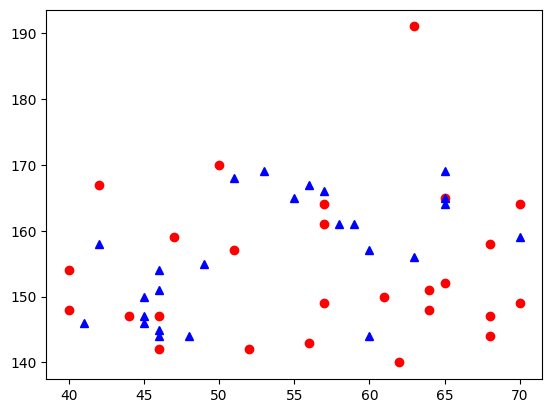

In [14]:
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'o', color='r')    
plt.plot([d[0] for d in data[1::2]],
        [d[1] for d in data[1::2]], '^', color='b')    

# 2.군집화 로직

In [16]:
# 초기 랜덤지점 2개
random_points = [[random.randint(40, 95), random.randint(140,195)],
              [random.randint(40,95), random.randint(140,195)]]
random_points

[[41, 153], [61, 150]]

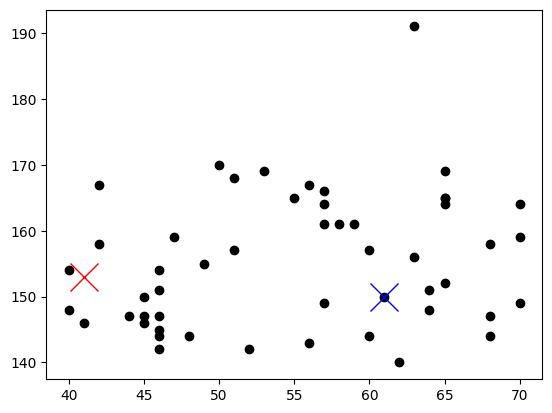

In [17]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o', color='k')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=20)
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=20)

In [28]:
# 두 점의 거리를 return a:(0,0) ~ b:(4,3)
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2  + (a[1]-b[1])**2 )

In [29]:
# random_points[0]과 random_points[1]을 기준으로 나눈 두 영역
group1 = [] # random_points[0]이 가까운 그룹
group2 = [] # random_points[1]이 가까운 그룹
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) # 빨간X랑 더 가까운 그룹
    else:
        group2.append(d) # 파란 X랑 더 가까운 그룹
len(group1), len(group2)

(22, 29)

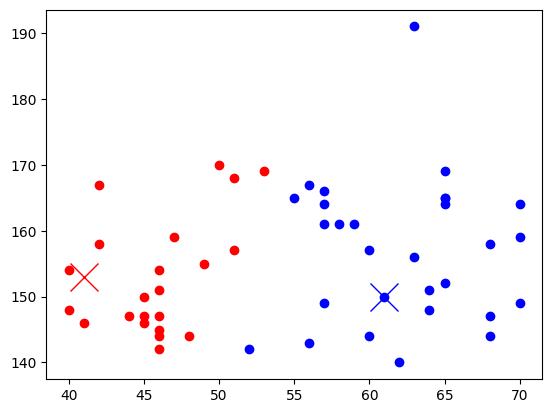

In [30]:

# 새로운 그룹 group1과 group2, 초기 램던 지점
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=20) # 기준점2
plt.show()

In [32]:
# 기준점 이동 group
sumX=0 ; sumY=0
for g in group1:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점
random_points[0] = [sumX/len(group1), sumY/len(group1)]
sumX=0 ; sumY=0
for g in group2:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점
random_points[1] = [sumX/len(group2), sumY/len(group2)]
random_points

[[45.86363636363637, 153.0909090909091],
 [62.06896551724138, 156.9655172413793]]

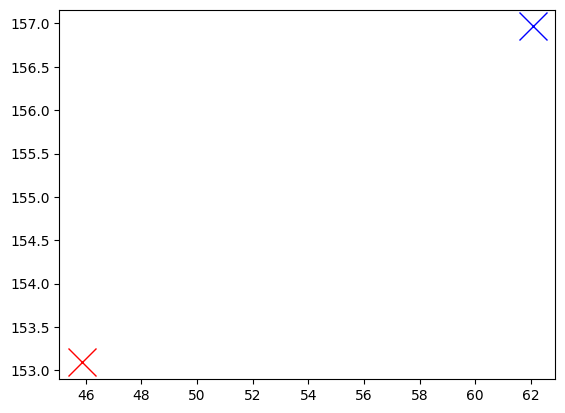

In [34]:
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=20) # 기준점2
plt.show()

# 3. 전체코드 (for 문 이용)
- data 생성
- 랜덤포인트2지점
- 랜덤포인트 2지점 기준으로 group1 과 group2
- 랜덤포인트 이용(group1중간지점, group2중간지점)

초기 points :  [[62, 191], [48, 166]]
1 번째 points :  [[80.78048780487805, 178.17073170731706], [57.220338983050844, 155.64406779661016]]
2 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]
3 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]
4 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]
5 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]
6 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]
7 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]
8 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]
9 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]
10 번째 points :  [[80.0, 176.375], [54.76923076923077, 154.26923076923077]]


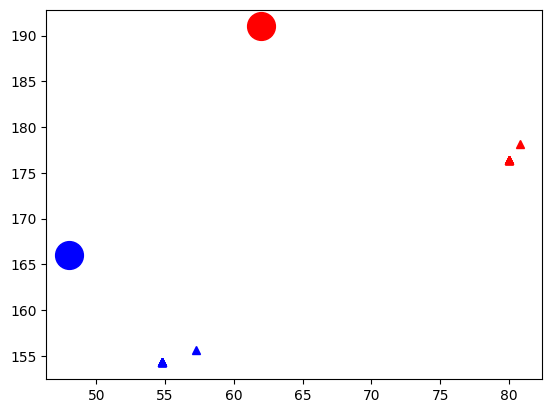

In [51]:
 #데이터 생성
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60,95), random.randint(160,195)])
# point 지정
points = [[random.randint(40,95), random.randint(140,195)],
          [random.randint(40,95), random.randint(140,195)]]
print("초기 points : ", points)
plt.plot(points[0][0], points[0][1], 'o', c='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'o', c='b', markersize=20)
# 포인트 2지점기준으로 group1과 group2
for i in range(1, 11):
    group1 = [] # points[0]과 가까운 그룹
    group2 = [] # points[1]과 가까운 그룹
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group1.append(d)
        else:
            group2.append(d)
    # 새로운 포인트로 할당
    sumX = 0; sumY=0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points[0] = [sumX/len(group1), sumY/len(group1)]
    sumX = 0; sumY=0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    points[1] = [sumX/len(group2), sumY/len(group2)]
    print(i, "번째 points : ", points)
    plt.plot(points[0][0], points[0][1], '^', c='r')
    plt.plot(points[1][0], points[1][1], '^', c='b')

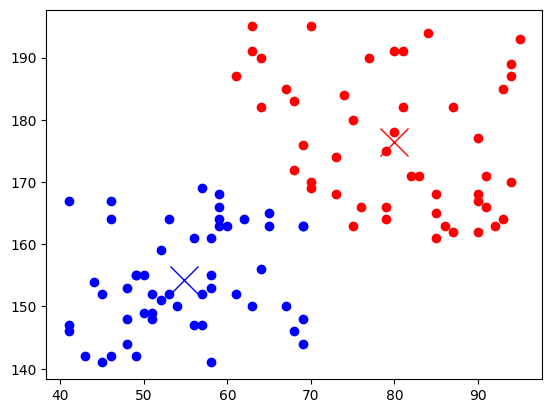

In [54]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1],'o',color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2],'o',color='b')
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)

plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)

# 4. api(sklearn)를 이용한 군집화
- sklearn 머신러닝
    * 예측함수 - 분류, 회귀, 군집분석  fit(학습), predict(예측)
    * 변환모델 - 전처리 ex) 스케일조정   fit(학습), transform(변환함수)

In [ ]:
# 군집분석 라이브러리가 joblib 충돌 경도 메세지 출력
import os 
os.envirnon["OMP_NUM_THREADS"] = "1"


In [60]:
data = np.array(data)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,   #2개 그룹으로 나눠
              init='random',   #초기 중심점 랜덤하게
              n_init=10, # 10번 실행
              random_state=7)
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [62]:
# 중심점
model.cluster_centers_

array([[ 79.56, 175.84],
       [ 54.2 , 153.92]])

In [63]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [66]:
group1 = data[model.labels_==1]
group2 = data[model.labels_==0]
c1, c2 = model.cluster_centers_

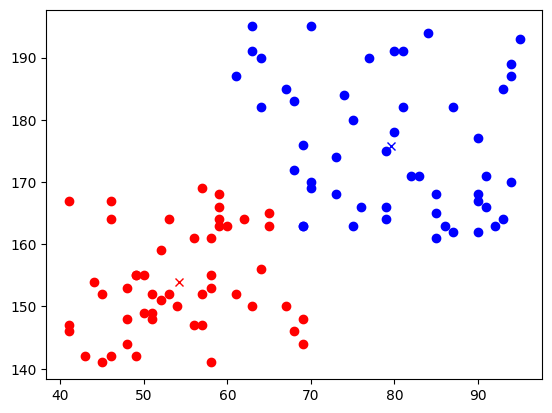

In [69]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt.plot(c1[0], c1[1], 'x', color='b')       # group2의 중싱점
plt.plot(c2[0], c2[1], 'x', color='r')       # group1의 중싱점